<a href="https://colab.research.google.com/github/Marzerp/Pokemon_Statistics/blob/main/Analisis_Pokemon_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto de Análisis de Datos de Pokémon


### Autores:
#####Araceli Romero, Daniel Rangel

### Fecha:
##### Abril 2025

##Descripción:
#####Este proyecto realiza una limpieza, análisis descriptivo, muestreo y pruebas estadísticas sobre un dataset de Pokémon. Se analizan principalmente las variables 'HP' y 'Speed' por tipo y generación.


# 1. Librerias

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,ttest_1samp, skew, norm,stats,probplot,f_oneway,kruskal,kstest
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro


# 2. Limpieza de datos

In [ ]:
# Leer el dataset
df= pd.read_csv("Pokemon.csv")

In [ ]:
# Revisar información inicial del dataset
df.info()
df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   total       1072 non-null   object
 4   hp          1072 non-null   int64 
 5   attack      1072 non-null   int64 
 6   defense     1072 non-null   int64 
 7   sp_attack   1072 non-null   int64 
 8   sp_defense  1072 non-null   int64 
 9   speed       1072 non-null   int64 
 10  generation  1072 non-null   int64 
 11  legendary   1072 non-null   bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 93.3+ KB


1072

In [ ]:
# Limpiar la columna 'total' y corregir nombres de columnas
df['total'] = df['total'].str.replace(',','').astype(int)
df = df.rename(columns={'type1': 'type'})

df.info()
df.groupby('generation').size()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1072 non-null   int64 
 1   name        1072 non-null   object
 2   type        1072 non-null   object
 3   total       1072 non-null   int64 
 4   hp          1072 non-null   int64 
 5   attack      1072 non-null   int64 
 6   defense     1072 non-null   int64 
 7   sp_attack   1072 non-null   int64 
 8   sp_defense  1072 non-null   int64 
 9   speed       1072 non-null   int64 
 10  generation  1072 non-null   int64 
 11  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(2)
memory usage: 93.3+ KB


,0
generation,
0,3
1,178
2,106
3,160
4,121
5,166
6,85
7,114
8,139


In [ ]:
# Corregir errores en 'generation' y en los nombres de 'type'
df.loc[df['generation'] == 0, 'generation'] = 7   # Cambiar todos los que tienen generación 0 a generación 7
df['type'] = df['type'].str.replace('Graaass', 'Grass')
df['type'] = df['type'].str.replace('Graass', 'Grass')
df['type'] = df['type'].str.replace('Blastoise', 'Water')
df['type'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

#3. Presentación de los datos

In [ ]:
# Cantidad de Pokémon por generación
generation = df.groupby('generation').size()
generation

,0
generation,
1,178
2,106
3,160
4,121
5,166
6,85
7,117
8,139


In [ ]:
#cantidad de pokemon por typo:
tipo=df.groupby('type').size()
tipo

,0
type,
Bug,83
Dark,48
Dragon,41
Electric,63
Fairy,23
Fighting,45
Fire,67
Flying,9
Ghost,43


como tenemos solo 9 datos en Flying la borraremos para evitar sesgos de datos

In [ ]:
df=df[df['type']!='Flying']


In [ ]:
# Clasificación manual de tipos de variable
tipos_variable = {
    'id': 'Cuantitativa discreta',
    'name': 'Cualitativa nominal',
    'type': 'Cualitativa nominal',
    'total': 'Cuantitativa discreta',
    'hp': 'Cuantitativa discreta',
    'attack': 'Cuantitativa discreta',
    'defense': 'Cuantitativa discreta',
    'sp_attack': 'Cuantitativa discreta',
    'sp_defense': 'Cuantitativa discreta',
    'speed': 'Cuantitativa discreta',
    'generation': 'Cualitativa nominal',
    'legendary': 'Cualitativa nominal'
}

# Cantidad de datos por variable
cantidad_datos = df.count()

In [ ]:
# Crear tabla de resumen
tabla_variables = pd.DataFrame({
    'Variable': cantidad_datos.index,
    'Cantidad de datos': cantidad_datos.values,
    'Tipo de variable': [tipos_variable[col] for col in cantidad_datos.index]
})
tabla_variables

,Variable,Cantidad de datos,Tipo de variable
0,id,1063,Cuantitativa discreta
1,name,1063,Cualitativa nominal
2,type,1063,Cualitativa nominal
3,total,1063,Cuantitativa discreta
4,hp,1063,Cuantitativa discreta
5,attack,1063,Cuantitativa discreta
6,defense,1063,Cuantitativa discreta
7,sp_attack,1063,Cuantitativa discreta
8,sp_defense,1063,Cuantitativa discreta
9,speed,1063,Cuantitativa discreta


In [ ]:
df.to_csv('pokemon_limpio.csv', index=False)



# 2.1 variables a usar

In [ ]:
cols = ['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
df[cols].corr()


,total,hp,attack,defense,sp_attack,sp_defense,speed
total,1.000000,0.650198,0.733629,0.629866,0.726383,0.713232,0.552293
hp,0.650198,1.000000,0.454093,0.299301,0.361093,0.386142,0.174570
attack,0.733629,0.454093,1.000000,0.459525,0.359764,0.258046,0.364013
defense,0.629866,0.299301,0.459525,1.000000,0.218950,0.534930,0.002638
sp_attack,0.726383,0.361093,0.359764,0.218950,1.000000,0.506078,0.434253
sp_defense,0.713232,0.386142,0.258046,0.534930,0.506078,1.000000,0.218321
speed,0.552293,0.174570,0.364013,0.002638,0.434253,0.218321,1.000000


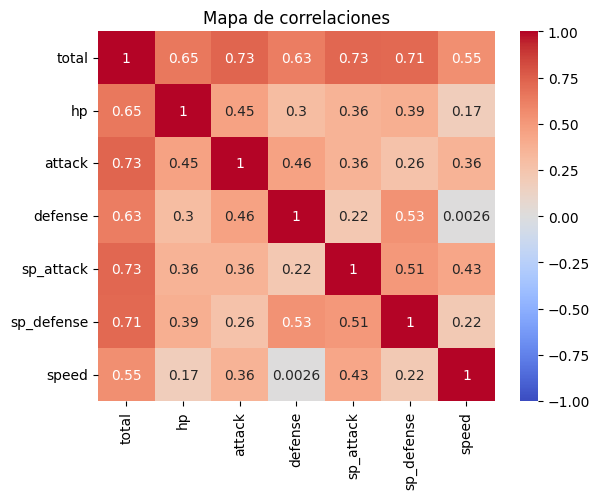

In [ ]:
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm',vmin=-1,vmax=1,center=0)
plt.title("Mapa de correlaciones")
plt.show()

como vimos total esta muy relacionado con todas las variables numericas, porque? porque es la suam de todas ellas! asi que la descartaremos para poder hacer buena estadistica

In [ ]:
correlacion = df[['speed', 'attack']].corr()
print(correlacion)


           speed    attack
speed   1.000000  0.364013
attack  0.364013  1.000000


# Clustering

viendo la cantidad tan grande que hay de tipos de pokemon procedemos a usar dbscan para hacer clusters por densidad y procedemos a identificar la mejor forma de escoger que tipos de pokemon usar por cada cluster(los outliers fueron tratados con BNP(Best No Penalized))

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def aplicar_dbscan(df, cols, eps=0.5, min_samples=5):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[cols])
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    etiquetas = dbscan.fit_predict(X_scaled)
    return etiquetas, X_scaled


In [ ]:
from scipy.spatial.distance import cdist

def reasignar_outliers(df, cols):
    centroides = df[df['cluster'] != -1].groupby('cluster')[cols].mean()
    outliers_idx = df[df['cluster'] == -1].index
    outliers = df.loc[outliers_idx, cols]
    distancias = cdist(outliers, centroides)
    nuevos_clusters = distancias.argmin(axis=1)
    df.loc[outliers_idx, 'cluster'] = nuevos_clusters
    return df


In [ ]:
from scipy.spatial.distance import cdist

def reasignar_outliers(df, cols):
    centroides = df[df['cluster'] != -1].groupby('cluster')[cols].mean()
    outliers_idx = df[df['cluster'] == -1].index
    outliers = df.loc[outliers_idx, cols]
    distancias = cdist(outliers, centroides)
    nuevos_clusters = distancias.argmin(axis=1)
    df.loc[outliers_idx, 'cluster'] = nuevos_clusters
    return df


In [ ]:
def tipos_por_cluster(df):
    return df.groupby('cluster')['type'].value_counts().unstack(fill_value=0)


In [ ]:
def tipos_por_cluster(df):
    return df.groupby('cluster')['type'].value_counts().unstack(fill_value=0)


In [ ]:
cols = ['hp','speed']
etiquetas, X_scaled = aplicar_dbscan(df, cols)
df['cluster'] = etiquetas


In [ ]:
df = reasignar_outliers(df, cols)


In [ ]:
tabla_tipos = tipos_por_cluster(df)
print(tabla_tipos)


type     Bug  Dark  Dragon  Electric  Fairy  Fighting  Fire  Ghost  Grass  \
cluster                                                                     
0         83    48      41        63     23        45    67     43     95   

type     Ground  Ice  Normal  Poison  Psychic  Rock  Steel  Water  
cluster                                                            
0            42   38     117      42       80    60     39    137  


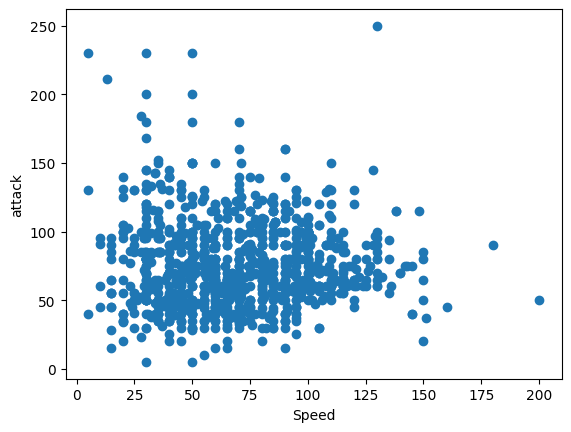

In [ ]:
plt.scatter(df["speed"],df["defense"])
plt.xlabel('Speed')
plt.ylabel('attack')
plt.show()

In [ ]:
plt.scatter(df["speed"].gr,df["hp"])
plt.xlabel('Speed')
plt.ylabel('HP')
plt.show()

despues de hacer varios tratamientos al ver que sin importar los clusters la mayoria de datos se concentran en uno determino que

# graficas

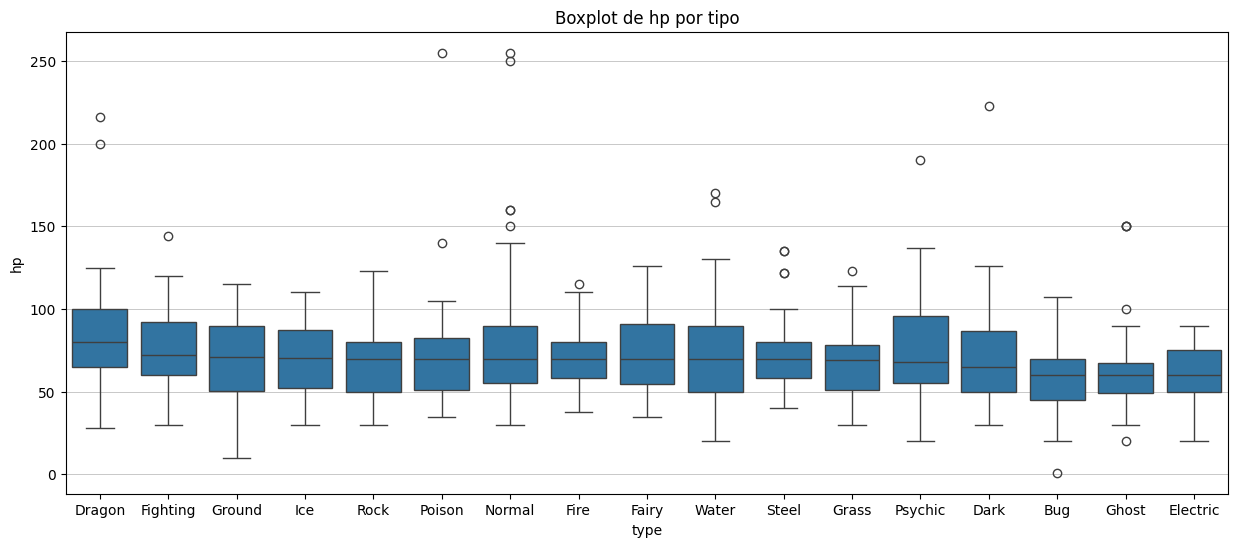

In [ ]:
# Boxplot de HP por tipo
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='type', y='hp',order=df.groupby('type')['hp'].median().sort_values(ascending=False).index)
plt.title('Boxplot de hp por tipo')
plt.grid(True, axis='y', linewidth=0.7, alpha=0.7)
plt.show()

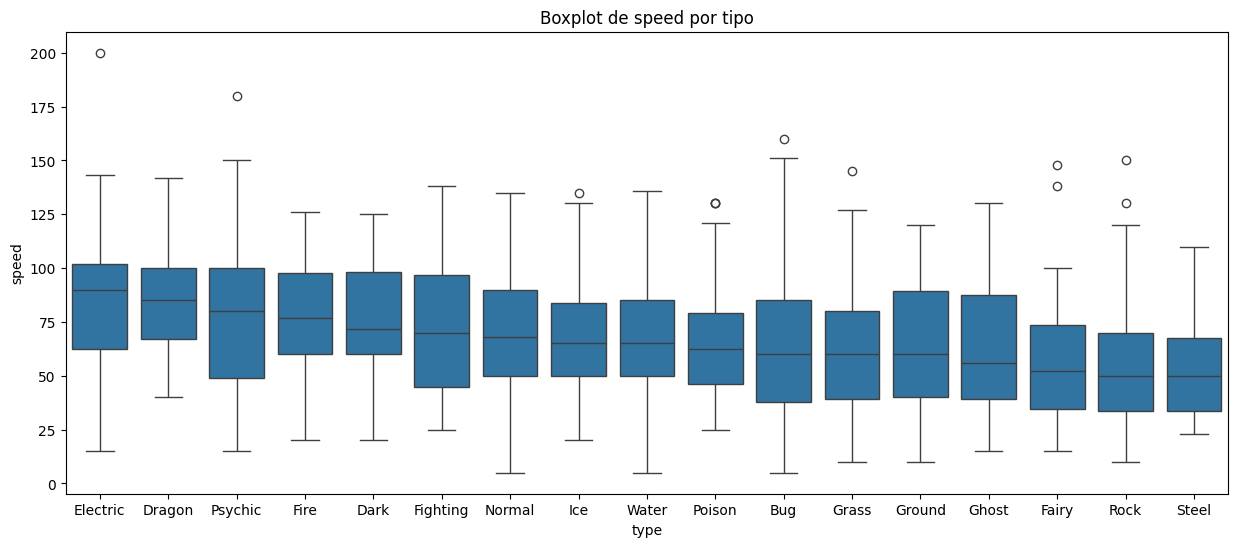

In [ ]:
# Boxplot de speed por tipo
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='type', y='speed',order=df.groupby('type')['speed'].median().sort_values(ascending=False).index)
plt.title('Boxplot de speed por tipo')
plt.show()

In [ ]:
# Boxplot de HP por generación
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='generation', y='hp',order=df.groupby('generation')['hp'].median().sort_values(ascending=False).index)
plt.title('Boxplot de hp por generacion')
plt.show()

In [ ]:
# Boxplot de speed por generación
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='generation', y='speed',order=df.groupby('generation')['speed'].median().sort_values(ascending=False).index)
plt.title('Boxplot de speed por generacion')
plt.show()

# 4. Estadística descriptiva

In [ ]:
# Función para calcular resumen estadístico
def resumen_estadistico(df):
  re = pd.DataFrame({
    'Media': df.mean(),
    'Mediana': df.median(),
    'Moda': df.mode().iloc[0],
    'Desviación estándar': df.std(ddof=1),
    'Varianza': df.var(ddof=1),
    'Mínimo': df.min(),
    'Máximo': df.max(),
    'Asimetría': df.apply(skew)
  })
  return re.round(2)

Resumen estadistico para hp y speed general

In [ ]:
# ahora usamos la funcion de resumen apra la velocidad y hp para todos los tipos y todas la generaciones
print(resumen_estadistico(df[['hp', 'speed']]))

       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     70.47     68.0  60.0                26.91    724.37       1     255   
speed  68.66     65.0  50.0                30.08    904.59       5     200   

       Asimetría  
hp          1.77  
speed       0.42  



Resumen estadistico por tipo

In [ ]:
# Aplicar resumen para diferentes subconjuntos
# De manera más corta
tipo=df.groupby('type')
for i, data in tipo:
    subset = data[['hp', 'speed']]
    print(f"Resumen estadístico tipo - {i}")
    print(resumen_estadistico(subset))
    print("\n")

Resumen estadístico tipo - Bug
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     57.10     60.0  60.0                17.13    293.58       1     107   
speed  63.42     60.0  40.0                33.59   1128.05       5     160   

       Asimetría  
hp         -0.34  
speed       0.74  


Resumen estadístico tipo - Dark
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     71.31     65.0    65                31.55    995.50      30     223   
speed  76.94     71.5    60                25.72    661.29      20     125   

       Asimetría  
hp          2.40  
speed       0.09  


Resumen estadístico tipo - Dragon
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     85.24     80.0  80.0                37.13   1378.39      28     216   
speed  84.34     85.0  80.0                24.15    583.03      40     142   

       Asimetría  
hp          1.65  
speed      -0.10  


Resumen estadístico t

Resumen estadistico por generacion

In [ ]:
gen=df.groupby('generation')
for i, data in gen:
    subset = data[['hp', 'speed']]
    print(f"Resumen estadístico generacion - {i}")
    print(resumen_estadistico(subset))
    print("\n")

Resumen estadístico generacion - 1
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     66.56     62.0    65                28.79    828.84      10     250   
speed  72.71     70.0    90                29.18    851.70      15     150   

       Asimetría  
hp          1.99  
speed       0.37  


Resumen estadístico generacion - 2
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     71.21     70.0    75                30.59    935.71      20     255   
speed  61.81     60.5    85                27.26    743.28       5     130   

       Asimetría  
hp          2.53  
speed       0.18  


Resumen estadístico generacion - 3
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     66.54     65.0    70                24.06    578.87       1     170   
speed  66.92     65.0    50                31.33    981.69      10     180   

       Asimetría  
hp          0.95  
speed       0.75  


Resumen estad

bien ahoa segun estos datos son en bruto asi que abajo normalizaremos para ver como quedan:

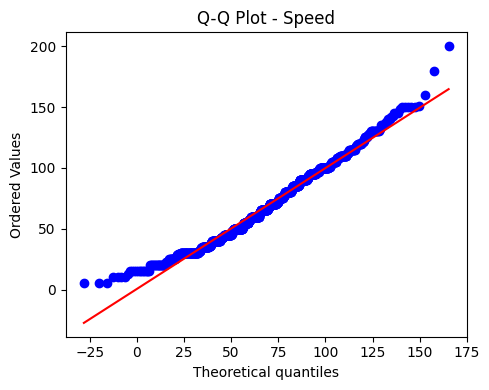

In [ ]:
datos = df['speed']
plt.figure(figsize=(5, 4))
stats.probplot(datos, dist="norm", plot=plt, sparams=(datos.mean(), datos.std()))
plt.title("Q-Q Plot - Speed")
plt.tight_layout()
plt.show()

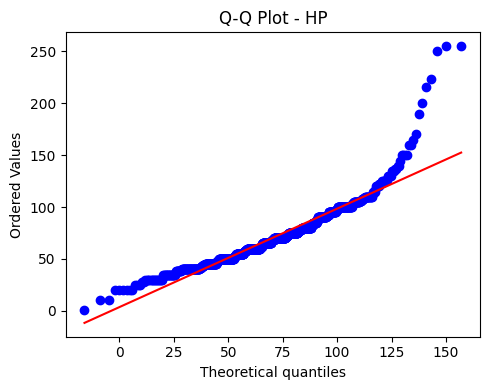

In [ ]:
datos = df['hp']
plt.figure(figsize=(5, 4))
stats.probplot(datos, dist="norm", plot=plt, sparams=(datos.mean(), datos.std()))
plt.title("Q-Q Plot - HP")
plt.tight_layout()
plt.show()

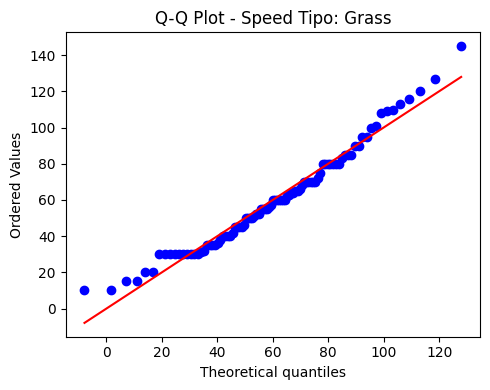

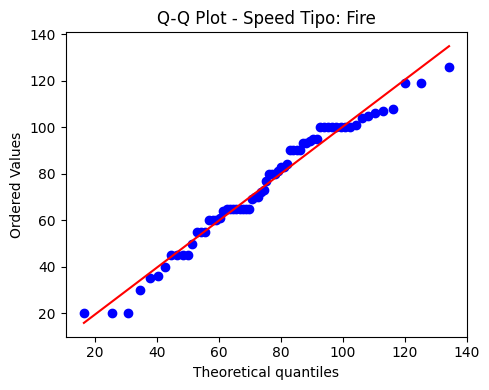

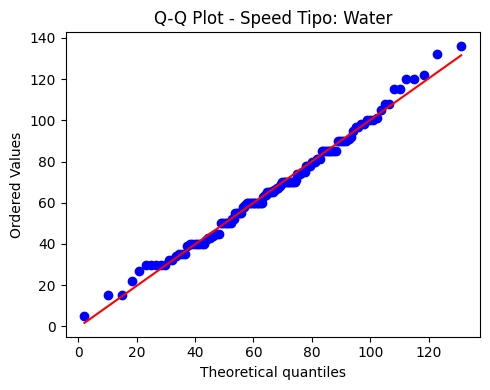

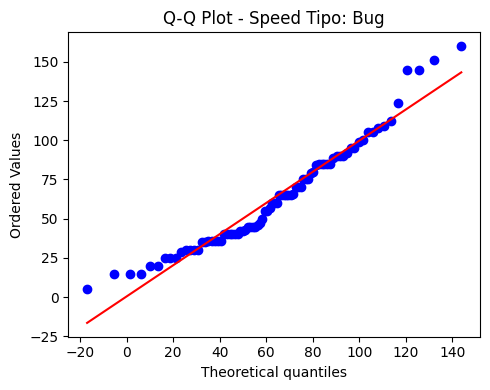

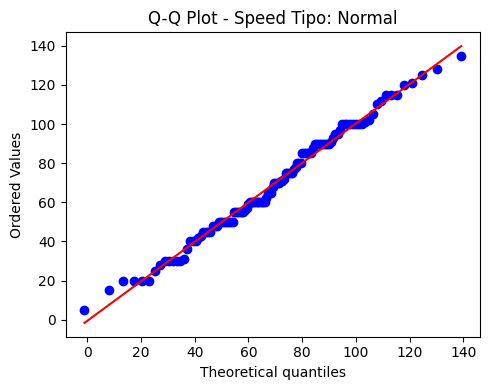

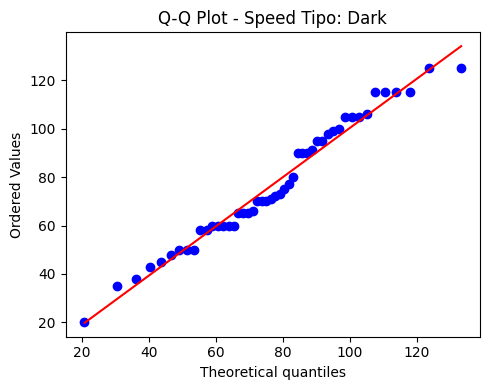

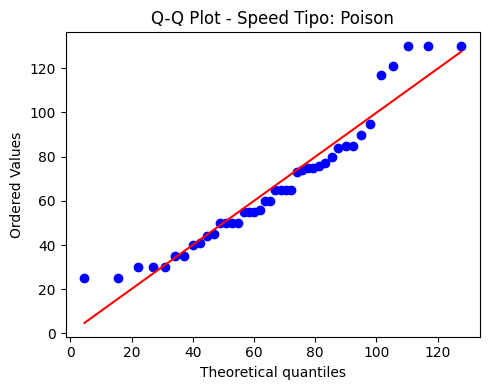

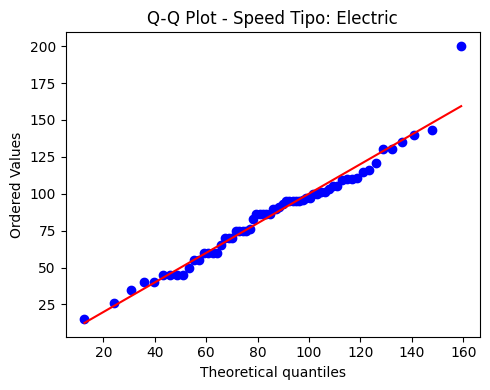

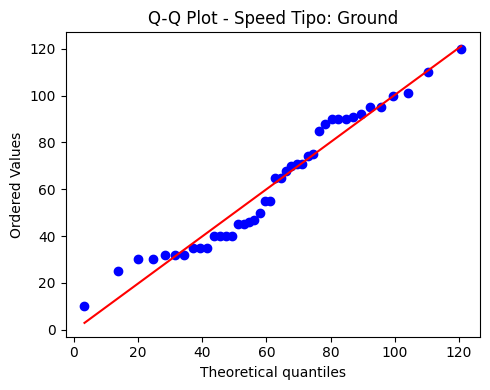

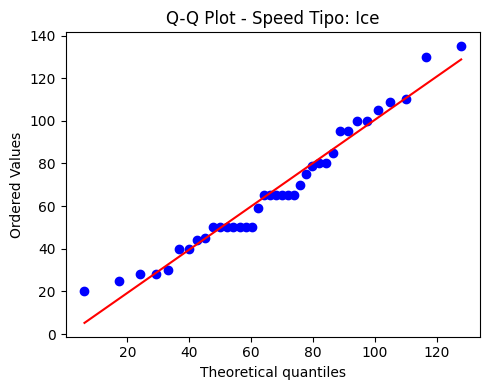

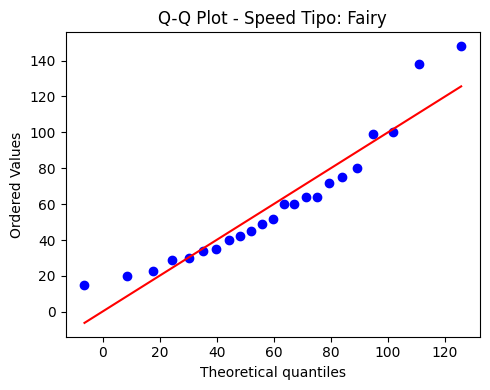

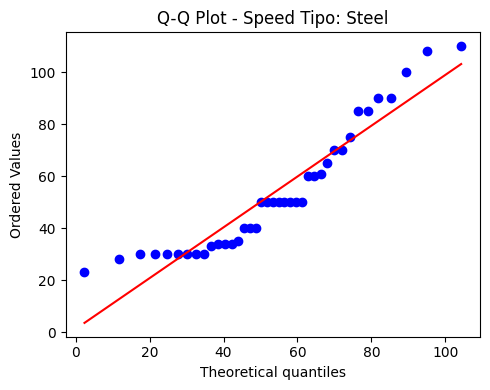

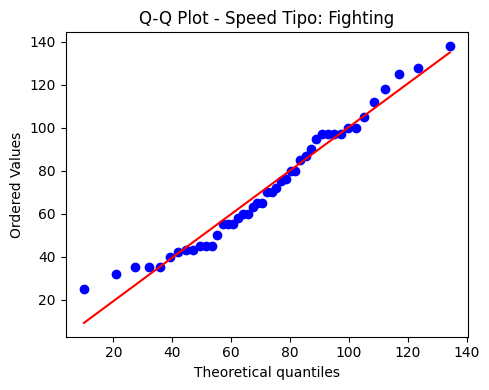

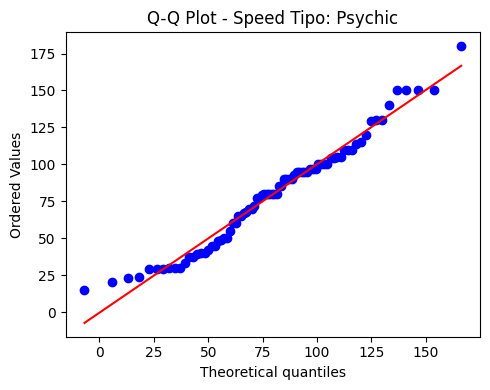

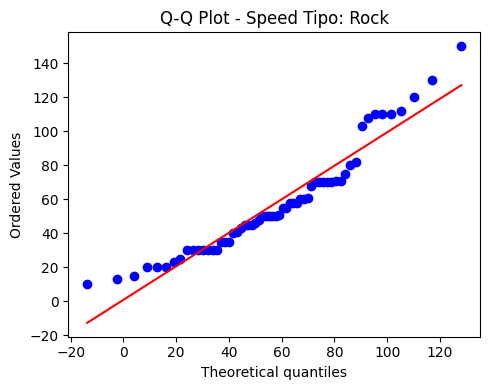

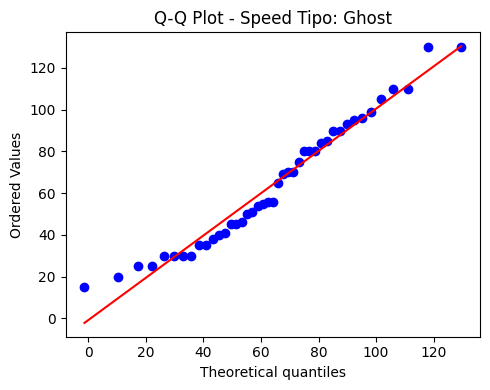

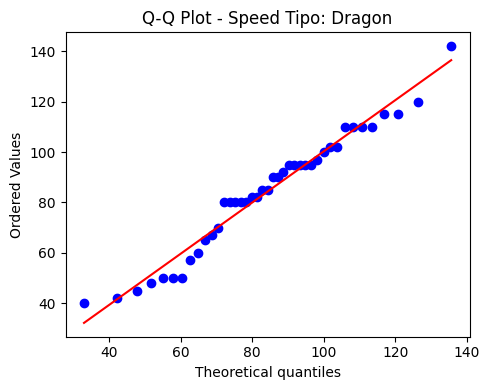

In [ ]:
tipos = df['type'].unique()

for tipo in tipos:
    dftype = df.query("type == @tipo")
    datos = dftype['speed']

    plt.figure(figsize=(5, 4))
    stats.probplot(datos, dist="norm", plot=plt , sparams=(datos.mean(),datos.std()))
    plt.title(f"Q-Q Plot - Speed Tipo: {tipo}")
    plt.tight_layout()
    plt.show()


In [ ]:
tipos = df['type'].unique()

for tipo in tipos:
    dftype = df.query("type == @tipo")
    datos = dftype['hp']

    plt.figure(figsize=(5, 4))
    stats.probplot(datos, dist="norm", plot=plt , sparams=(datos.mean(),datos.std()))
    plt.title(f"Q-Q Plot - HP Tipo: {tipo}")
    plt.tight_layout()
    plt.show()

In [ ]:

gen = df['generation'].unique()

for generacion in gen:
    dftype = df.query("generation == @generacion")
    datos = dftype['speed']

    plt.figure(figsize=(5, 4))
    stats.probplot(datos, dist="norm", plot=plt, sparams=(datos.mean(),datos.std()))
    plt.title(f"Q-Q Plot - Generacion: {generacion}")
    plt.tight_layout()
    plt.show()


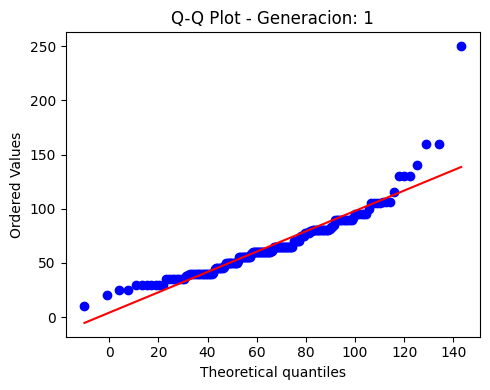

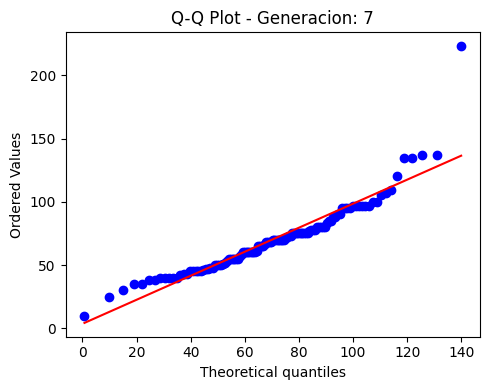

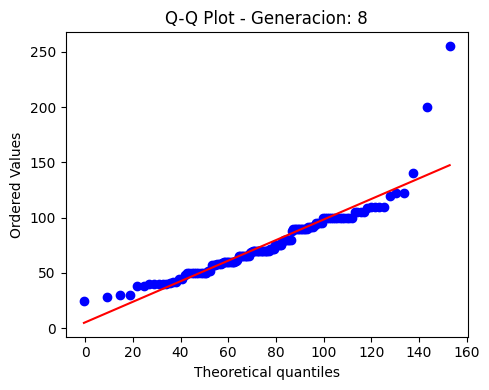

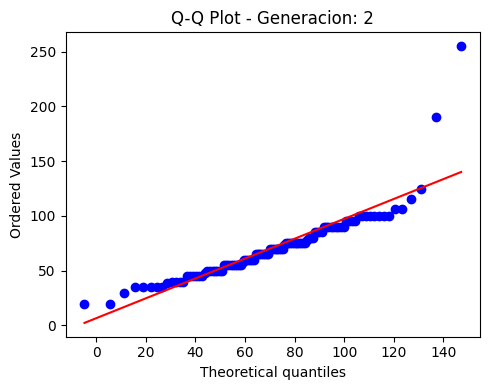

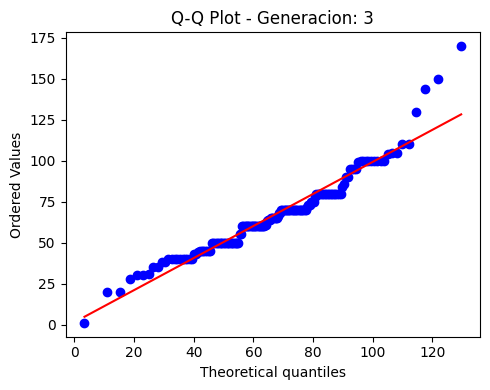

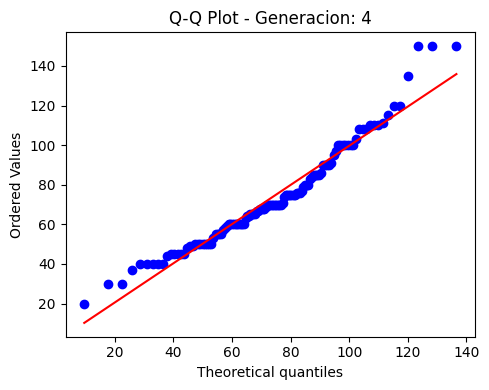

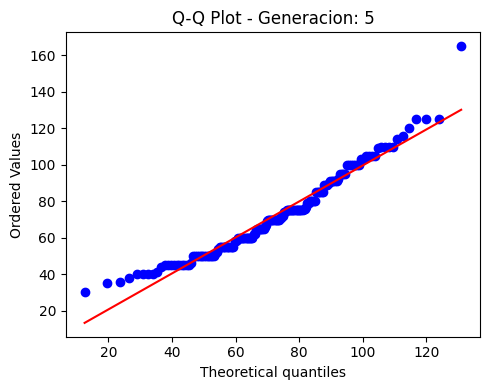

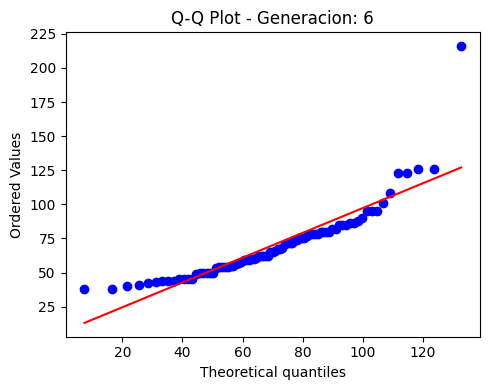

In [ ]:

gen = df['generation'].unique()

for generacion in gen:
    dftype = df.query("generation == @generacion")
    datos = dftype['hp']

    plt.figure(figsize=(5, 4))
    stats.probplot(datos, dist="norm", plot=plt, sparams=(datos.mean(),datos.std()))
    plt.title(f"Q-Q Plot - Generacion: {generacion}")
    plt.tight_layout()
    plt.show()

qqplots normalizados:


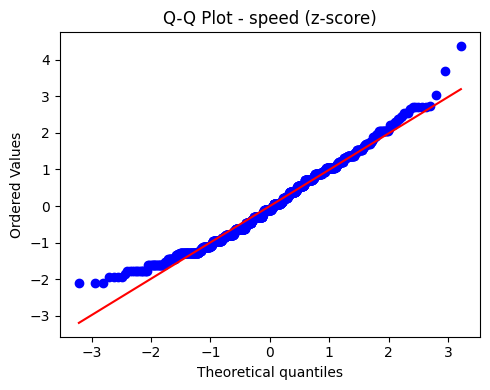

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Extrae la variable
datos = df['speed']

# 2. Estandariza (z-score)
datos_z = (datos - datos.mean()) / datos.std()

# 3. Q-Q plot contra Normal estándar
plt.figure(figsize=(5, 4))
stats.probplot(datos_z, dist="norm", plot=plt)
plt.title("Q-Q Plot - speed (z-score)")
plt.tight_layout()
plt.show()


=== Shapiro–Wilk ===
log_hp → W: 0.9471, p-valor: 0.0000
log_speed → W: 0.9560, p-valor: 0.0000
log_speed → W: 0.9560, p-valor: 0.0000
log_defense → W: 0.9744, p-valor: 0.0000

=== Kolmogorov–Smirnov contra N(0,1) (z-score) ===
log_hp → D: 0.0724, p-valor: 0.0000
log_speed → D: 0.0855, p-valor: 0.0000
log_speed → D: 0.0855, p-valor: 0.0000
log_defense → D: 0.0553, p-valor: 0.0029


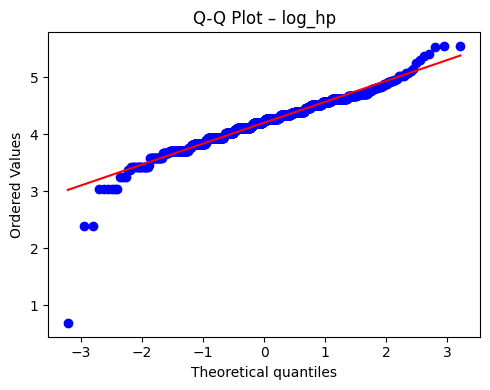

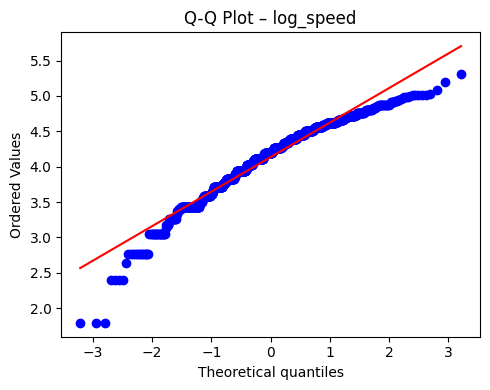

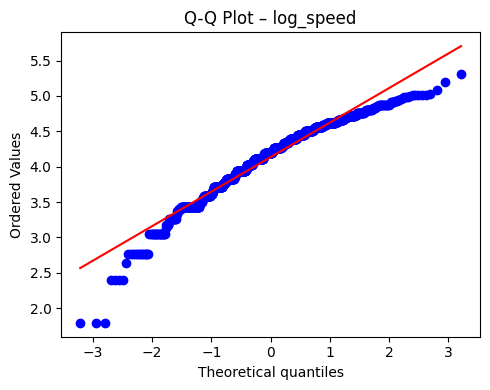

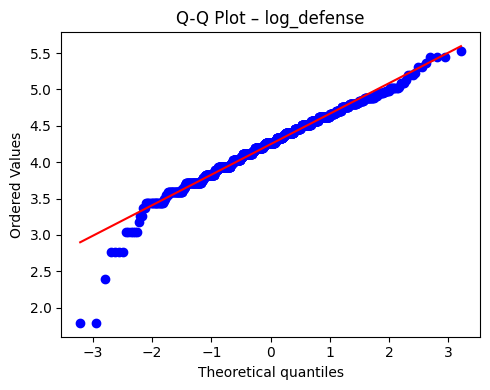

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro, kstest

# 1. Escoge las variables que quieres transformar
variables = ['hp', 'speed','speed','defense']  # puedes añadir más si lo deseas

# 2. Crea un DataFrame nuevo con las columnas log-transformadas
df_log = df.copy()
for var in variables:
    # +1 para evitar log(0)
    df_log[f'log_{var}'] = np.log(df[var] + 1)

# 3. Test de normalidad sobre los datos log-transformados
print("=== Shapiro–Wilk ===")
for var in variables:
    datos = df_log[f'log_{var}']
    W, p_sw = shapiro(datos)
    print(f"log_{var} → W: {W:.4f}, p-valor: {p_sw:.4f}")

print("\n=== Kolmogorov–Smirnov contra N(0,1) (z-score) ===")
for var in variables:
    datos = df_log[f'log_{var}']
    # estandariza antes de K–S
    datos_z = (datos - datos.mean()) / datos.std()
    D, p_ks = kstest(datos_z, 'norm')
    print(f"log_{var} → D: {D:.4f}, p-valor: {p_ks:.4f}")

# 4. Q-Q plots de los log-transformados
for var in variables:
    datos = df_log[f'log_{var}']
    plt.figure(figsize=(5, 4))
    stats.probplot(datos, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot – log_{var}")
    plt.tight_layout()
    plt.show()


In [ ]:
#kolmovorov para todos los datos:

resultados = []

# Extraemos y normalizamos 'speed' de todo el df
datos = df['speed']
datos_norm = (datos - datos.mean()) / datos.std()

# Test de Kolmogorov–Smirnov contra normal estándar
estadistico, p_valor = kstest(datos_norm, 'norm')

# Guardamos e imprimimos
resultados.append({
    'estadístico D': estadistico,
    'p-valor': p_valor
})
print(f"Todo el DF → D: {estadistico:.4f}, p-valor: {p_valor:.4f}")


Todo el DF → D: 0.0683, p-valor: 0.0001


In [ ]:
#aplciamos kolmovorob apra generacion pq son mmuchos datos

resultados = []

for gen in df['generation'].unique():
    datos = df.query("generation == @gen")['speed']

    # Normalizamos los datos antes de aplicar K-S contra normal estándar
    datos_norm = (datos - datos.mean()) / datos.std()

    estadistico, p_valor = kstest(datos_norm, 'norm')

    resultados.append({
        'generation': gen,
        'estadístico D': estadistico,
        'p-valor': p_valor
    })

    print(f"Generación {gen} -> D: {estadistico:.4f}, p-valor: {p_valor:.4f}")

Generación 1 -> D: 0.0673, p-valor: 0.3797
Generación 7 -> D: 0.1233, p-valor: 0.0521
Generación 8 -> D: 0.0783, p-valor: 0.3656
Generación 2 -> D: 0.0827, p-valor: 0.4400
Generación 3 -> D: 0.0984, p-valor: 0.0842
Generación 4 -> D: 0.1154, p-valor: 0.0736
Generación 5 -> D: 0.0850, p-valor: 0.1766
Generación 6 -> D: 0.1058, p-valor: 0.2897


In [ ]:
#aplicamos shapiro para tipo pq son como 50 maso


resultados_shapiro = []

for gen in df['type'].unique():
    datos = df.query("type == @gen")['speed']

    estadistico, p_valor = shapiro(datos)

    resultados_shapiro.append({
            'type': gen,
            'estadístico W': estadistico,
            'p-valor': p_valor
        })

    print(f"type {gen} -> W: {estadistico:.4f}, p-valor: {p_valor:.4f}")


type Grass -> W: 0.9698, p-valor: 0.0269
type Fire -> W: 0.9707, p-valor: 0.1151
type Water -> W: 0.9909, p-valor: 0.5193
type Bug -> W: 0.9500, p-valor: 0.0028
type Normal -> W: 0.9878, p-valor: 0.3747
type Dark -> W: 0.9705, p-valor: 0.2644
type Poison -> W: 0.9277, p-valor: 0.0108
type Electric -> W: 0.9692, p-valor: 0.1152
type Ground -> W: 0.9496, p-valor: 0.0624
type Ice -> W: 0.9584, p-valor: 0.1682
type Fairy -> W: 0.9028, p-valor: 0.0288
type Steel -> W: 0.8880, p-valor: 0.0010
type Fighting -> W: 0.9625, p-valor: 0.1526
type Psychic -> W: 0.9717, p-valor: 0.0730
type Rock -> W: 0.9264, p-valor: 0.0014
type Ghost -> W: 0.9591, p-valor: 0.1282
type Dragon -> W: 0.9659, p-valor: 0.2521


In [ ]:
variables = ['hp','speed','attack','defense','sp_attack','sp_defense']

In [ ]:
tipos = df['type'].unique()

for var in variables:
    grupos = [df[df['type'] == tipo][var] for tipo in tipos]

    estadistico, pvalue = kruskal(*grupos)
    print(f"Variable: {var} | Estadístico H: {estadistico:.2f} | p-value: {pvalue:.4f}")


Variable: hp | Estadístico H: 49.86 | p-value: 0.0000
Variable: speed | Estadístico H: 90.77 | p-value: 0.0000
Variable: attack | Estadístico H: 109.93 | p-value: 0.0000
Variable: defense | Estadístico H: 117.05 | p-value: 0.0000
Variable: sp_attack | Estadístico H: 185.40 | p-value: 0.0000
Variable: sp_defense | Estadístico H: 63.00 | p-value: 0.0000


In [ ]:

variables = ['hp','speed','attack','defense','sp_attack','sp_defense']

for var in variables:
    # Prueba de Kolmogorov-Smirnov para normalidad
    estadistico, pvalue = kstest(df[var], 'norm', args=(df[var].mean(), df[var].std()))
    print(f"Variable: {var} | Test de Kolmogorov-Smirnov | Estadístico D: {estadistico:.4f} | p-value: {pvalue:.4f}")

Variable: hp | Test de Kolmogorov-Smirnov | Estadístico D: 0.1048 | p-value: 0.0000
Variable: speed | Test de Kolmogorov-Smirnov | Estadístico D: 0.0683 | p-value: 0.0001
Variable: attack | Test de Kolmogorov-Smirnov | Estadístico D: 0.0628 | p-value: 0.0004
Variable: defense | Test de Kolmogorov-Smirnov | Estadístico D: 0.0916 | p-value: 0.0000
Variable: sp_attack | Test de Kolmogorov-Smirnov | Estadístico D: 0.1054 | p-value: 0.0000
Variable: sp_defense | Test de Kolmogorov-Smirnov | Estadístico D: 0.0720 | p-value: 0.0000


# 5. Gráficas descriptivas

In [ ]:
# Boxplot de HP por generación
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='generation', y='hp')
plt.title('Boxplot de hp por generacion')
plt.show()


In [ ]:
variables_cuanti = df[['hp', 'speed']]
resumen = resumen_estadistico(variables_cuanti)
print(resumen)

In [ ]:
# Boxplot de HP por tipo de Pokémon
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='hp')
plt.title('Distribución de HP por tipo de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('HP')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Boxplot de velocidad por tipo de Pokémonplt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='speed')
plt.title('Distribución de Speed por tipo de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('Speed')
plt.xticks(rotation=45, ha='right')
plt.show()

# 6. Muestreo e intervalos de confianza

In [ ]:
df_gen1 = df[df['generation'] == 1]
df_gen2 = df[df['generation'] == 2]
df_gen3 = df[df['generation'] == 3]
df_gen4 = df[df['generation'] == 4]
df_gen5 = df[df['generation'] == 5]
df_gen6 = df[df['generation'] == 6]
df_gen7 = df[df['generation'] == 7]
df_gen8 = df[df['generation'] == 8]

In [ ]:
# Función para calcular intervalos de confianza
def intervalo_confianza(muestra, nivel):
    n = len(muestra)
    media = np.mean(muestra)
    std = np.std(muestra, ddof=1)
    z = norm.ppf(1 - (1 - nivel) / 2)
    margen_error = z * (std / np.sqrt(n))
    return round(media - margen_error, 2), round(media + margen_error, 2)

In [ ]:
# Muestreo aleatorio simple de tamaño 30
muestra_aleatoria_gen1 = df_gen1['speed'].sample(n=30, random_state=2)
#muestra_aleatoria_gen1 = pd.DataFrame(muestra_aleatoria_gen1)
muestra_aleatoria_gen1

In [ ]:
# Muestreo estratificado por tipo
tipos = df_gen1['type'].value_counts(normalize=True)
muestra_por_tipo = (tipos * 30).round().astype(int)

ajuste = 30 - muestra_por_tipo.sum()
if ajuste != 0:
    muestra_por_tipo.iloc[0] += ajuste

muestra_estratificada_gen1 = pd.Series(dtype=int)
for tipo, n in muestra_por_tipo.items():
    subset = df_gen1[df_gen1['type'] == tipo]['speed']
    muestra = subset.sample(n=n, random_state=42)
    muestra_estratificada_gen1 = pd.concat([muestra_estratificada_gen1, muestra])

#muestra_estratificada_gen1 = pd.DataFrame(muestra_estratificada_gen1)
muestra_estratificada_gen1

# 7. Tabla de frecuencias y resumen



- Muestra aleatoria

In [ ]:
freq_abs = muestra_aleatoria_gen1.value_counts().sort_index()
freq_rel = freq_abs / len(muestra_aleatoria_gen1)
freq_rel_acum = freq_rel.cumsum()
z_scores_aleatoria = zscore(muestra_aleatoria_gen1)

tabla_aleatoria = pd.DataFrame({
    'Speed': freq_abs.index,
    'Frecuencia absoluta': freq_abs.values,
    'Frecuencia relativa': freq_rel.values.round(4),
    'Frecuencia relativa acumulada': freq_rel_acum.values.round(4)
})
tabla_z_aleatoria = pd.DataFrame({'Speed': muestra_aleatoria_gen1.values, 'Z': z_scores_aleatoria})
tabla_z_aleatoria = tabla_z_aleatoria.groupby('Speed').agg({'Z': 'mean'}).reset_index()
tabla_aleatoria_final = pd.merge(tabla_aleatoria, tabla_z_aleatoria, on='Speed')
tabla_aleatoria_final



*   Muestra estratificada



In [ ]:
freq_abs_est = muestra_estratificada_gen1.value_counts().sort_index()
freq_rel_est = freq_abs_est / len(muestra_estratificada_gen1)
freq_rel_acum_est = freq_rel_est.cumsum()
z_scores_est = zscore(muestra_estratificada_gen1)

tabla_estratificada = pd.DataFrame({
    'Speed': freq_abs_est.index,
    'Frecuencia absoluta': freq_abs_est.values,
    'Frecuencia relativa': freq_rel_est.values.round(4),
    'Frecuencia relativa acumulada': freq_rel_acum_est.values.round(4)
})
tabla_z_est = pd.DataFrame({'Speed': muestra_estratificada_gen1.values, 'Z': z_scores_est})
tabla_z_est = tabla_z_est.groupby('Speed').agg({'Z': 'mean'}).reset_index()
tabla_estratificada_final = pd.merge(tabla_estratificada, tabla_z_est, on='Speed')
tabla_estratificada_final

In [ ]:
resumen_aleatoria = resumen_estadistico(muestra_aleatoria_gen1.to_frame())
resumen_estratificada = resumen_estadistico(muestra_estratificada_gen1.to_frame())

resumen_aleatoria
resumen_estratificada

# 8. Graficas descriptivas

In [ ]:
# Histograma
plt.hist(muestra_aleatoria_gen1, bins=10, alpha=0.6, label='Aleatoria', color='skyblue')
plt.hist(muestra_estratificada_gen1, bins=10, alpha=0.6, label='Estratificada', color='salmon')
plt.title('Histograma de velocidad - Gen 1')
plt.xlabel('Velocidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

# Caja y bigotes
sns.boxplot(data=[muestra_aleatoria_gen1.values, muestra_estratificada_gen1.values], palette=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Aleatoria', 'Estratificada'])
plt.title('Caja y bigotes de velocidad - Gen 1')
plt.grid(True)
plt.show()


#9. Intervalos de confianza para la media

In [ ]:
niveles = [0.85, 0.95, 0.99]

# Aleatoria
ics_aleatoria = {f"{int(n*100)}%": intervalo_confianza(muestra_aleatoria_gen1, n) for n in niveles}
ic_aleatoria_df = pd.DataFrame.from_dict(ics_aleatoria, orient='index', columns=['Inferior', 'Superior'])

# Estratificada
ics_estratificada = {f"{int(n*100)}%": intervalo_confianza(muestra_estratificada_gen1, n) for n in niveles}
ic_estratificada_df = pd.DataFrame.from_dict(ics_estratificada, orient='index', columns=['Inferior', 'Superior'])

ic_aleatoria_df
ic_estratificada_df

#10. Prueba de hipótesis sobre la media

In [ ]:
# Calcular la media real de todos los Pokémon de Gen 1
media_real_gen1 = df_gen1['speed'].mean()

# Prueba t para la muestra aleatoria
t_aleatoria, p_aleatoria = ttest_1samp(muestra_aleatoria_gen1, media_real_gen1)

# Prueba t para la muestra estratificada
t_estratificada, p_estratificada = ttest_1samp(muestra_estratificada_gen1, media_real_gen1)

# Resultados como diccionario
hipotesis_aleatoria = {
    'Media real Gen 1': round(media_real_gen1, 2),
    'Media muestra aleatoria': round(muestra_aleatoria_gen1.mean(), 2),
    'Valor p': round(p_aleatoria, 4),
    'Conclusión': "Se rechaza H0" if p_aleatoria < 0.05 else "No se rechaza H0"
}

hipotesis_estratificada = {
    'Media real Gen 1': round(media_real_gen1, 2),
    'Media muestra estratificada': round(muestra_estratificada_gen1.mean(), 2),
    'Valor p': round(p_estratificada, 4),
    'Conclusión': "Se rechaza H0" if p_estratificada < 0.05 else "No se rechaza H0"
}
print("Hipótesis aleatoria:")

print("p= 0.05")
for key, value in hipotesis_aleatoria.items():
    print(f"{key}: {value}")
    print()

print("Hipótesis estratificada:")
for key, value in hipotesis_estratificada.items():
    print(f"{key}: {value}")
    print()

In [ ]:
niveles = [0.85, 0.95, 0.99]

# Prueba de hipótesis sobre la media (adaptado)
# Calcular la media real de todos los Pokémon de Gen 1
media_real_gen1 = df_gen1['speed'].mean()

# Prueba t para la muestra aleatoria
t_aleatoria, p_aleatoria = ttest_1samp(muestra_aleatoria_gen1, media_real_gen1)

# Prueba t para la muestra estratificada
t_estratificada, p_estratificada = ttest_1samp(muestra_estratificada_gen1, media_real_gen1)


# Función para mostrar los resultados de la prueba de hipótesis
def mostrar_resultados_hipotesis(nombre_muestra, media_muestra, p_valor, nivel):
    print(f"Hipótesis {nombre_muestra}:")
    print(f"Media real Gen 1: {round(media_real_gen1, 2)}")
    print(f"Media {nombre_muestra}: {round(media_muestra, 2)}")
    print(f"Valor p: {round(p_valor, 4)}")
    print(f"Conclusión: {'Se rechaza H0' if p_valor < 1.0-nivel else 'No se rechaza H0'}")
    print()

# Mostrar resultados para cada nivel de confianza
for nivel in niveles:
    print(f"Nivel de confianza: {int(nivel*100)}%")

    mostrar_resultados_hipotesis("aleatoria", muestra_aleatoria_gen1.mean(), p_aleatoria, nivel)
    mostrar_resultados_hipotesis("estratificada", muestra_estratificada_gen1.mean(), p_estratificada, nivel)
